In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

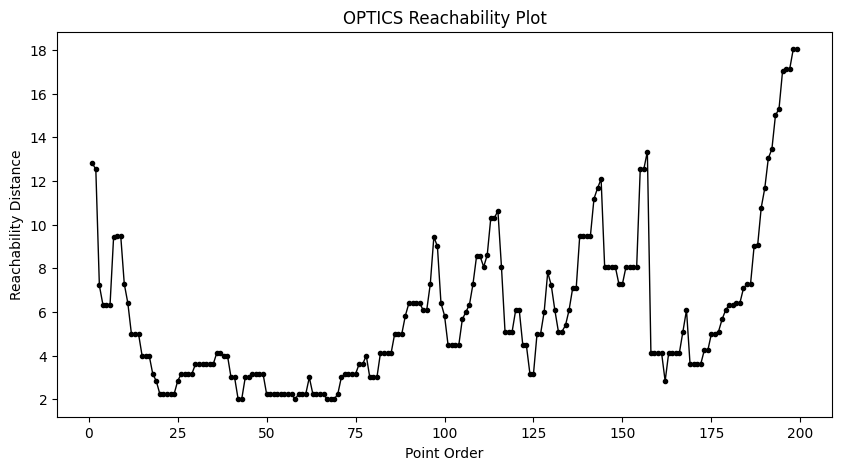

In [14]:

#from sklearn.cluster import OPTICS
#model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
#model.fit(x)

# Reachability plot
space = np.arange(len(x))
reachability = model.reachability_[model.ordering_]

plt.figure(figsize=(10, 5))
plt.plot(space, reachability, marker='.', color='black', linewidth=1)
plt.ylabel('Reachability Distance')
plt.xlabel('Point Order')
plt.title('OPTICS Reachability Plot')
plt.show()

In [8]:
from sklearn.cluster import OPTICS
optics=OPTICS(min_samples=5,xi=0.05,min_cluster_size=0.1)# min_cluster_size--->Cluster must have at least 10% of total points,Cluster must have at least 5 points
y_optics=optics.fit_predict(x)
#parameters
#min_samples ----> Minimum neighbors--->5–10
#xi------>	Cluster separation sensitivity----->	0.05–0.1
#min_cluster_size-------->	Minimum cluster size-->	Cluster must have at least 5 points,Cluster must have at least 10% of total points (frictional and integers too)

In [9]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_Group']=y_optics
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


C:\Users\USER\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


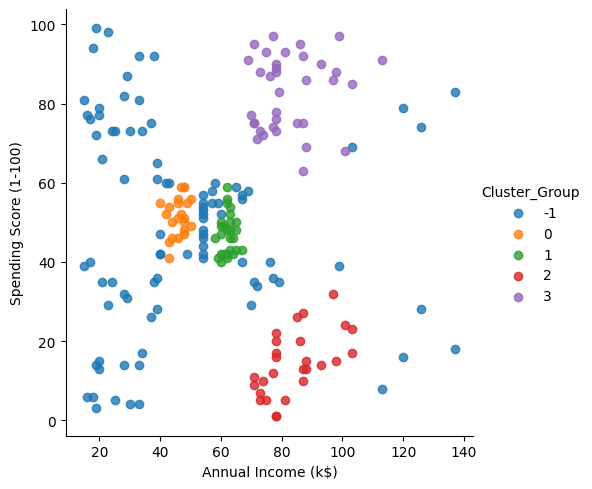

In [10]:
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False
                ,legend=True,legend_out=True)